In [6]:
import pandas as pd  
import matplotlib.pyplot as plt

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或者使用其他支持中文的字体，如 'Microsoft YaHei'  
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题  

In [11]:
cities = ['南京市', '无锡市', '徐州市', '常州市', '苏州市', '南通市', '连云港市', '淮安市', '盐城市', '扬州市', '镇江市', '泰州市', '宿迁市']  
  
# 创建一个空的DataFrame来存储所有城市的数据  
all_data = pd.DataFrame()  
  
for city in cities:  
    # 读取CSV文件  
    df = pd.read_csv(f"{city}.csv")  
    # 假设CSV文件中有'date', 'daytemp_float' 和 'nighttemp_float' 列  
    # 添加城市名作为一列，以便后续区分  
    df['city'] = city  
    # 将当前城市的数据追加到all_data中  
    all_data = pd.concat([all_data, df], ignore_index=True)  
  
# 现在，all_data 包含所有城市的数据，并有一个额外的'city'列来区分它们

In [12]:
all_data['date'] = pd.to_datetime(all_data['date'])  
all_data.sort_values(by=['date', 'city'], inplace=True)

<Figure size 1200x800 with 0 Axes>

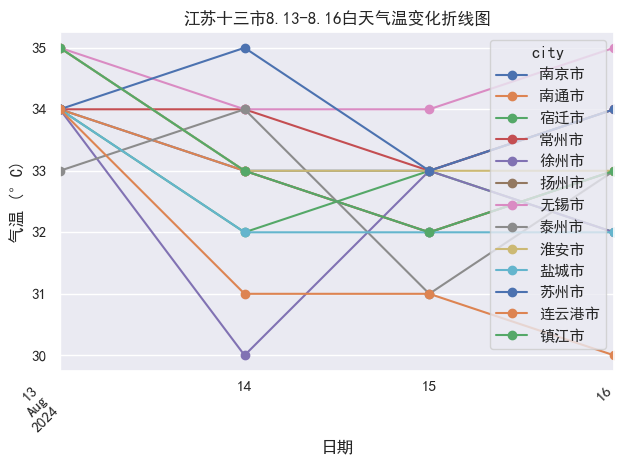

In [15]:
# 使用pivot_table来重组数据，使得日期是索引，城市是列，气温是值  
day_temps = all_data.pivot_table(index='date', columns='city', values='daytemp')  
  
# 绘制折线图  
plt.figure(figsize=(12, 8))  
day_temps.plot(marker='o')  
plt.title('江苏十三市8.13-8.16白天气温变化折线图')  
plt.xlabel('日期')  
plt.ylabel('气温 (°C)')  
plt.xticks(rotation=45, ha="right")  # 旋转x轴标签以便更好地显示  
plt.tight_layout()  
plt.savefig('白天气温折线图.pdf') 
plt.show()

<Figure size 1200x800 with 0 Axes>

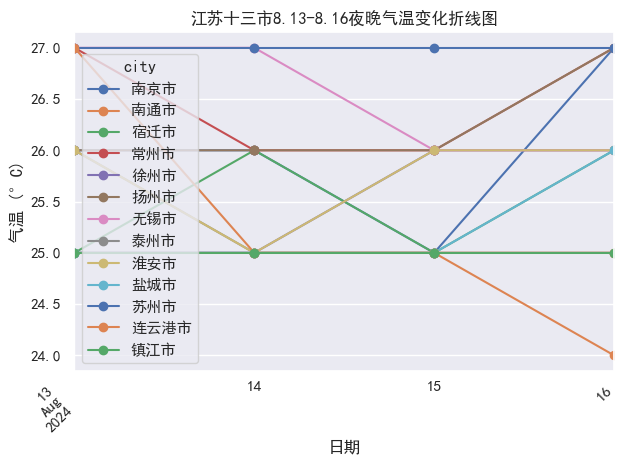

In [16]:
day_temps = all_data.pivot_table(index='date', columns='city', values='nighttemp')  
  
plt.figure(figsize=(12, 8))  
day_temps.plot(marker='o')  
plt.title('江苏十三市8.13-8.16夜晚气温变化折线图')  
plt.xlabel('日期')  
plt.ylabel('气温 (°C)')  
plt.xticks(rotation=45, ha="right")  # 旋转x轴标签以便更好地显示  
plt.tight_layout()  
plt.savefig('夜晚气温折线图.pdf') 
plt.show()

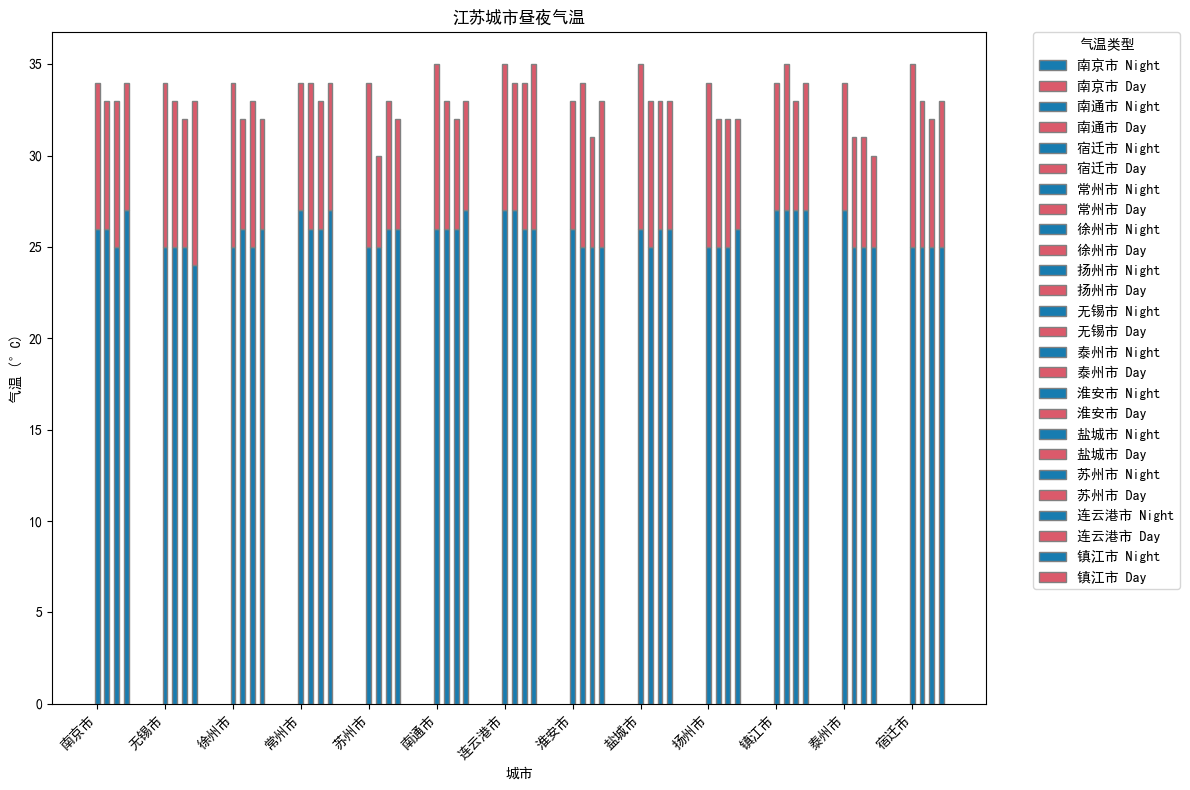

In [10]:
import pandas as pd  
import matplotlib.pyplot as plt  
import os  
  
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['axes.unicode_minus'] = False  

cities = ['南京市', '无锡市', '徐州市', '常州市', '苏州市', '南通市', '连云港市', '淮安市', '盐城市', '扬州市', '镇江市', '泰州市', '宿迁市']  
   
all_weather_data = pd.DataFrame()  
     
for city in cities:  
    file_path = f'{city}.csv'  
    if os.path.exists(file_path):  
        city_data = pd.read_csv(file_path)       
 
        if len(city_data) >= 4:  
            city_data = city_data.head(4)  
              
            temp_data = pd.DataFrame({  
                'city': [city] * 4,  
                'day': range(1, 5),  # 假设我们简单地用1到4来表示四天  
                'nighttemp': city_data['nighttemp_float'].head(4),  
                'daytemp': city_data['daytemp_float'].head(4)  
            })  
              
            # 添加到总DataFrame中  
            all_weather_data = pd.concat([all_weather_data, temp_data], ignore_index=True)  
  
  
# 设置绘图  
fig, ax = plt.subplots(figsize=(12, 8))  
bar_width = 0.5   
city_gap = 1  # 城市之间的间隙（以条宽为单位）  
num_days = 4  # 每个城市要显示的天数  
   
index = range(0, len(cities) * (num_days + (num_days - 1) * city_gap), num_days + (num_days - 1) * city_gap)  
  
# 绘制堆叠柱状图  
for i, (city_group, group_data) in enumerate(all_weather_data.groupby('city')):  
    night_temps = group_data['nighttemp'].values  
    day_temps = group_data['daytemp'].values  
      
    # 计算当前城市四个柱子的X位置  
    x_pos = [index[i] + j * (bar_width + city_gap * bar_width) for j in range(num_days)]  
      
    # 绘制夜晚气温的蓝色部分  
    ax.bar(x_pos, night_temps, bar_width, bottom=0, label=f'{city_group} Night', color='#177cb0', edgecolor='grey')  
    # 绘制白天气温的红色部分，bottom是夜晚气温  
    ax.bar(x_pos, day_temps - night_temps, bar_width, bottom=night_temps, label=f'{city_group} Day', color='#db5a6b', edgecolor='grey')  
  
# 设置图表标题和标签  
ax.set_title('江苏城市昼夜气温')  
ax.set_xlabel('城市')  
ax.set_ylabel('气温 (°C)')  
ax.set_xticks(index)  
ax.set_xticklabels(cities, rotation=45, ha="right")  
ax.legend(title='气温类型', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)  
  
# 调整布局并保存为PDF  
plt.tight_layout()  
plt.savefig('昼夜气温柱状图.pdf')  
  
# 显示图形  
plt.show()

In [2]:
import pandas as pd  
  
# 定义城市列表和日期列表  
cities = ['南京市', '无锡市', '徐州市', '常州市', '苏州市', '南通市', '连云港市', '淮安市', '盐城市', '扬州市', '镇江市', '泰州市', '宿迁市']  
dates = ['2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16']  
  
# 初始化两个空的DataFrame来存储数据  
weather_df = pd.DataFrame(index=cities, columns=pd.MultiIndex.from_tuples([  
    (date, '白天天气') for date in dates  
] + [  
    (date, '夜晚天气') for date in dates  
]))  
  
wind_power_df = pd.DataFrame(index=cities, columns=pd.MultiIndex.from_tuples([  
    (date, '白天风向') for date in dates  
] + [  
    (date, '白天风力') for date in dates  
] + [  
    (date, '夜晚风向') for date in dates  
] + [  
    (date, '夜晚风力') for date in dates  
]))  
  
temp_df = pd.DataFrame(index=cities, columns=pd.MultiIndex.from_tuples([  
    (date, '白天气温') for date in dates  
] + [  
    (date, '夜晚气温') for date in dates  
]))  
  
# 读取CSV文件并填充DataFrame  
for city in cities:  
    csv_file = f"{city}.csv"  
    data = pd.read_csv(csv_file)  
      
    # 假设CSV文件中有一个名为'date'的列，并且其格式允许我们通过字符串匹配来筛选日期  
    for date in dates:  
        date_mask = data['date'].astype(str).str.contains(date)  # 确保'date'列是字符串类型以进行匹配  
          
        # 检查是否有匹配的行  
        if date_mask.any():  # 如果存在至少一行匹配  
            # 填充天气DataFrame  
            dayweather = data.loc[date_mask, 'dayweather'].iloc[0]  # 取第一行（假设每个日期只有一行或您只关心第一行）  
            nightweather = data.loc[date_mask, 'nightweather'].iloc[0]  
            weather_df.loc[city, (date, '白天天气')] = dayweather  
            weather_df.loc[city, (date, '夜晚天气')] = nightweather  
              
            # 填充风向风力DataFrame  
            daywind = data.loc[date_mask, 'daywind'].iloc[0]  
            daypower = data.loc[date_mask, 'daypower'].iloc[0]  
            nightwind = data.loc[date_mask, 'nightwind'].iloc[0]  
            nightpower = data.loc[date_mask, 'nightpower'].iloc[0]  
            wind_power_df.loc[city, (date, '白天风向')] = daywind  
            wind_power_df.loc[city, (date, '白天风力')] = daypower  
            wind_power_df.loc[city, (date, '夜晚风向')] = nightwind  
            wind_power_df.loc[city, (date, '夜晚风力')] = nightpower  
            
             # 填充气温DataFrame  
            daytemp = data.loc[date_mask, 'daytemp'].iloc[0]  
            nighttemp = data.loc[date_mask, 'nighttemp'].iloc[0]  
            temp_df.loc[city, (date, '白天气温')] = daytemp 
            temp_df.loc[city, (date, '夜晚气温')] = nighttemp  
        
        else:  
            # 如果没有匹配的行，您可以选择跳过、记录日志或填充默认值  
            print(f"No data found for {city} on {date}")  
  
# 显示DataFrame  
print("天气表格:")  
print(weather_df)  
weather_df.to_excel('weather_data.xlsx', index=True, sheet_name='Weather')

print("\n风向风力表格:")  
print(wind_power_df)
wind_power_df.to_excel('wind_power_data.xlsx', index=True, sheet_name='WindPower')

print("气温表格:")  
print(temp_df)  
temp_df.to_excel('temp_data.xlsx', index=True, sheet_name='Temp')

天气表格:
     2024-08-13 2024-08-14 2024-08-15 2024-08-16 2024-08-13 2024-08-14  \
           白天天气       白天天气       白天天气       白天天气       夜晚天气       夜晚天气   
南京市       中雨-大雨        雷阵雨         多云         多云        雷阵雨         多云   
无锡市          中雨          阴         多云          晴          阴          晴   
徐州市          多云         大雨          晴          晴         中雨          晴   
常州市          中雨         多云         多云          晴          阴          晴   
苏州市          多云         多云         多云         多云          阴         多云   
南通市          多云         多云         多云         多云         多云         多云   
连云港市         多云         小雨          晴         多云         多云         多云   
淮安市          大雨         多云         多云         多云         小雨          晴   
盐城市          中雨          阴         多云         多云         多云          晴   
扬州市          中雨         小雨         小雨          晴         小雨          晴   
镇江市          大雨          阴         小雨          晴          阴          晴   
泰州市          大雨          阴      